# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [9]:
import pandas as pd

In [10]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"Smartphone": ["iPhone 11", "Samsung Galaxy S20", "Google Pixel 4", "LG V60", "Nokia 9", "Sony Xperia 1", "iPhone SE"], "Price": [700,1000,800,700,450,1000,399]})
sample_df

,Smartphone,Price
0,iPhone 11,700
1,Samsung Galaxy S20,1000
2,Google Pixel 4,800
3,LG V60,700
4,Nokia 9,450
5,Sony Xperia 1,1000
6,iPhone SE,399


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from the "Smartphone" column that have a value of 700 in the "Price" column.


Follow along with the **live coding activity** to see how this works.

In [11]:
# This code selects all values from the first column, "Smartphone" where the value on that same row in the second column, "Price" is equal to 700
sample_df["Smartphone"].loc[sample_df["Price"]== 700]


0    iPhone 11
3       LG V60
Name: Smartphone, dtype: object

Now you try! Let's say you want to view some more expensive phones. Select all the values from the "Smartphone" column where the value on that same row in the "Price" column is equal to 1000.

In [12]:
sample_df["Smartphone"].loc[sample_df["Price"]== 1000]

1    Samsung Galaxy S20
5         Sony Xperia 1
Name: Smartphone, dtype: object

Let's say you definitely want an iPhone of some sort, but you want to see just iPhone prices. Now select all the values from the "Price" column where the value on that same row in the "Smartphone" column contains the word "iPhone".

In [13]:
sample_df["Price"].loc[sample_df["Smartphone"].str.contains("iPhone")]

0    700
6    399
Name: Price, dtype: int64

Let's say you're on a budget and don't want to spend more than $700 on a phone. Select all the values from the "Smartphone" column where the value on that same row in the "Price" column is less than or equal to 700.

In [14]:
sample_df[["Smartphone","Price"]].loc[sample_df["Price"] <= 700]

,Smartphone,Price
0,iPhone 11,700
3,LG V60,700
4,Nokia 9,450
6,iPhone SE,399


#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [15]:
# You will need to import numpy 
import numpy as np
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/week 3/oh_table.csv")
df_gdi = df.loc[df["group_id"]== 0]

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# You can use this function in your code to find the log of distance:
df_gdi["Absolute Magnitude"] = df_gdi["G"]-5*np.log10(df_gdi["distance"])+5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [18]:
import matplotlib.colors as mpl
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap("cividis_r")
abs = df_gdi["Absolute Magnitude"]
df_old = pd.read_csv("/content/drive/My Drive/Colab Notebooks/week 3/sample_class_star_data.csv")

In [19]:
X_axis = df_gdi["G"]-df_gdi["J"]
Temp = df_old["Temperature (K)"]

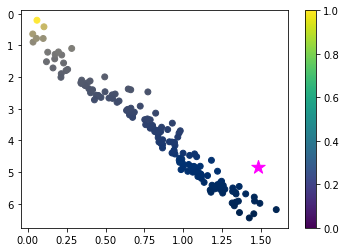

In [20]:
plt.scatter(X_axis, abs, c=abs, s=35, cmap=cm, norm=mpl.LogNorm())
plt.gca().invert_yaxis()
plt.scatter(1.48, 4.84, c='magenta', s=200, marker='*')
plt.colorbar()

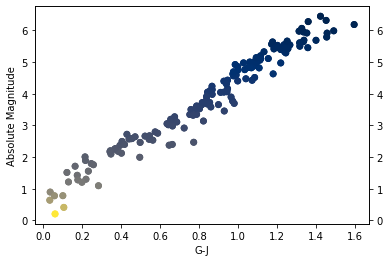

In [22]:
fig,ax = plt.subplots()
ax.scatter(X_axis, abs, c=abs, s=35, cmap=cm, norm=mpl.LogNorm())
ax.set_xlabel("G-J", fontsize = 10)
ax.set_ylabel("Absolute Magnitude", fontsize = 10)
ax2 = ax.twinx()
ax2.scatter(X_axis, abs, c=abs, s=35, cmap=cm, norm=mpl.LogNorm())

### Coding Challenge 1: Add the sun to your color magnitude diagram

### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster